# Carga de información geográfica de NTAs
Carga de librerías básicas de manipulación de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
geography = pd.read_csv("geographic.csv")

In [3]:
geography.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [4]:
geodf_raw = geography.transpose()

In [5]:
geodf_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,9292,9293,9294,9295,9296,9297,9298,9299,9300,9301
BK88,-73.976051,40.631284,-73.977167,40.630755,-73.977000,40.629880,-73.976851,40.629097,-73.976697,40.628363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QN52,-73.794934,40.757806,-73.794749,40.755636,-73.794579,40.753571,-73.794629,40.752711,-73.794657,40.751996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QN48,-73.775740,40.743334,-73.775799,40.743326,-73.778060,40.742995,-73.778601,40.742916,-73.779658,40.742738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QN51,-73.803792,40.775618,-73.800991,40.775397,-73.798653,40.775209,-73.798531,40.775199,-73.798234,40.774857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QN27,-73.861099,40.763673,-73.859931,40.762209,-73.859668,40.761910,-73.859137,40.761427,-73.859125,40.761284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El siguiente procedimiento convierte el formato leído a un formato similar al .wkt que lee la librería de gráficos `geopandas`

In [6]:
ntas_names = list(geodf_raw.index)
polygons = []
for i in range(len(geodf_raw)):
    string = 'POLYGON (('
    coord = ''
    for j in geodf_raw.columns:
        if (not pd.isna(geodf_raw.iloc[i,j])): 
            if j % 2 == 0:
                coord = str(geodf_raw.iloc[i,j])
            elif j % 2 == 1:
                coord = coord + ' ' + str(geodf_raw.iloc[i,j]) + ','
                string = string + coord
    string = string + str(geodf_raw.iloc[i,0]) + ' ' + str(geodf_raw.iloc[i,1]) + '))'
    polygons.append(string)
    
ntas_df = pd.DataFrame( {'name':ntas_names, 'geometry':polygons} )
ntas_df

,name,geometry
0,BK88,"POLYGON ((-73.9760507905698 40.6312841471042,-..."
1,QN52,"POLYGON ((-73.7949338459459 40.7578063026709,-..."
2,QN48,POLYGON ((-73.7757397458527 40.743333917592295...
3,QN51,"POLYGON ((-73.8037916164017 40.7756183875692,-..."
4,QN27,"POLYGON ((-73.8610986485262 40.7636727485249,-..."
...,...,...
190,MN32,"POLYGON ((-73.9380478369022 40.7808378163815,-..."
191,MN33,POLYGON ((-73.9350544306231 40.791695477244296...
192,MN99,"POLYGON ((-74.010929861053 40.684499723222,-74..."
193,QN18,"POLYGON ((-73.8587260603544 40.7357169097371,-..."


In [7]:
import geopandas

In [8]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

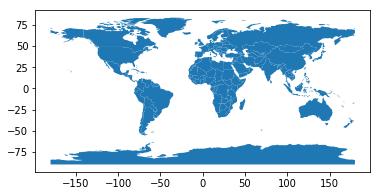

In [9]:
world.plot();

Se convierte el DataFrame en un GeoDataFrame

In [13]:
from shapely import wkt

In [14]:
ntas_df['geometry'] = ntas_df['geometry'].apply(wkt.loads)

In [15]:
gdf = geopandas.GeoDataFrame(ntas_df, geometry='geometry')

print(gdf.head())

   name                                           geometry
0  BK88  POLYGON ((-73.9760507905698 40.6312841471042, ...
1  QN52  POLYGON ((-73.79493384594591 40.7578063026709,...
2  QN48  POLYGON ((-73.7757397458527 40.7433339175923, ...
3  QN51  POLYGON ((-73.8037916164017 40.7756183875692, ...
4  QN27  POLYGON ((-73.86109864852619 40.7636727485249,...


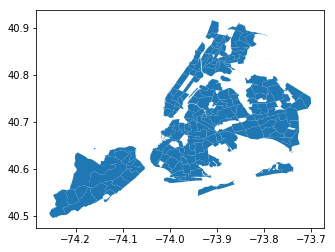

In [16]:
gdf.plot();

In [37]:
from shapely.geometry import Point, Polygon
punto = Point(-73.990,40.635)

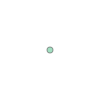

In [38]:
punto

In [47]:
arr_puntos = [punto.within(gdf['geometry'][i]) for i in range(len(gdf))]
# for i in range(len(gdf)):
#     print(punto.within(gdf['geometry'][i]))
gdf['name'][arr_puntos]

0    BK88
Name: name, dtype: object

In [55]:
list(gdf.loc[arr_puntos, 'name'])

['BK88']

In [84]:
def point_to_NTA(point):
    arr_puntos = [point.within(gdf['geometry'][i]) for i in range(len(gdf))]
    return(list(gdf.loc[arr_puntos, 'name']))

In [85]:
point_to_NTA(punto)

['BK88']

## Leyendo Uber y convirtiendo puntos en NTAs

In [59]:

pickup_lat = trips_2014.pickup_latitude.values.tolist()
pickup_lng = trips_2014.pickup_longitude.values.tolist()
points = []

for i in np.arange(len(pickup_lat)):
    coord = (pickup_lng[i], pickup_lat[i])
    point = Point(coord)
    points.append(point)

print(points)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [61]:
trips_2014 = pd.read_csv('uber_trips_2014.csv.gz')

In [95]:
uber2014 = trips_2014[:20000]
uber2014

,pickup_datetime,pickup_latitude,pickup_longitude,base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512
...,...,...,...,...
19995,4/17/14 18:12,40.7503,-73.9788,B02512
19996,4/17/14 18:12,40.7226,-74.0052,B02512
19997,4/17/14 18:13,40.7842,-73.9549,B02512
19998,4/17/14 18:13,40.7446,-73.9890,B02512


In [96]:
loc_to_nta = []
for i in list(zip(list(uber2014['pickup_latitude']),list(uber2014['pickup_longitude']))):
    loc_to_nta.append(point_to_NTA(Point(i[1],i[0])))

In [100]:
loc_to_nta

[[],
 [],
 ['MN22'],
 ['MN17'],
 ['MN19'],
 [],
 ['MN27'],
 ['MN17'],
 ['MN13'],
 ['MN17'],
 ['MN22'],
 ['MN19'],
 ['MN22'],
 [],
 ['QN70'],
 [],
 ['MN17'],
 [],
 ['MN13'],
 [],
 ['MN17'],
 ['MN13'],
 ['BK60'],
 ['MN22'],
 [],
 [],
 [],
 [],
 ['MN24'],
 ['MN23'],
 ['MN24'],
 ['MN12'],
 ['MN14'],
 ['MN15'],
 [],
 ['MN13'],
 ['MN14'],
 [],
 [],
 ['MN27'],
 [],
 ['MN13'],
 ['MN17'],
 [],
 [],
 [],
 ['MN24'],
 [],
 ['MN17'],
 ['MN40'],
 ['MN14'],
 ['MN19'],
 ['MN17'],
 [],
 ['MN19'],
 ['MN23'],
 ['MN24'],
 [],
 [],
 ['BX36'],
 ['MN19'],
 [],
 [],
 ['MN14'],
 ['BK73'],
 ['MN40'],
 [],
 ['MN13'],
 [],
 ['MN15'],
 ['MN13'],
 [],
 ['MN23'],
 ['MN13'],
 ['MN12'],
 ['MN22'],
 ['MN40'],
 ['MN24'],
 ['MN15'],
 ['MN40'],
 ['MN23'],
 [],
 ['MN14'],
 ['MN40'],
 [],
 [],
 ['MN13'],
 ['MN12'],
 ['BK76'],
 ['MN33'],
 [],
 ['MN40'],
 ['MN24'],
 ['MN12'],
 ['MN24'],
 [],
 ['MN17'],
 [],
 ['MN12'],
 [],
 ['MN24'],
 ['BK09'],
 ['QN70'],
 ['QN71'],
 ['MN15'],
 [],
 [],
 [],
 [],
 ['MN23'],
 ['MN14'],
 [],
 [

In [83]:
gdf

,name,geometry
0,BK88,"POLYGON ((-73.9760507905698 40.6312841471042, ..."
1,QN52,"POLYGON ((-73.79493384594591 40.7578063026709,..."
2,QN48,"POLYGON ((-73.7757397458527 40.7433339175923, ..."
3,QN51,"POLYGON ((-73.8037916164017 40.7756183875692, ..."
4,QN27,"POLYGON ((-73.86109864852619 40.7636727485249,..."
...,...,...
190,MN32,"POLYGON ((-73.9380478369022 40.7808378163815, ..."
191,MN33,"POLYGON ((-73.9350544306231 40.7916954772443, ..."
192,MN99,"POLYGON ((-74.010929861053 40.684499723222, -7..."
193,QN18,"POLYGON ((-73.8587260603544 40.7357169097371, ..."
